# HW2: Collecting and Exploring Data

## instructions

our course will be using an automatic grading system. <br>
after each question there will appear a code block with some prepared code to add your answer to a dictionary that will be sent to the course server for grading. <br>
please do not edit any code other than in placeholders marked `#### your code here ####` <br>
__don't forget to run the code block after you write your answer.__


you can add code blocks wherever you want in order to interact with datasets and play with your own code. <br>
in the next code block plase fill in your id number and email account in the appropriate placees. <br>
and __don't forget to run the block!__

In [1]:
ans = {}
ans['HW'] = 'HW2'
ans['id_number'] = 1

## pandas basics
#### Q1) Data formats: In Python, the object pandas.DataFrame stores a rectangular data structure, and the object Dictionary is flexible like a JSON object. In class we used `pandas.DataFrame.from_dict(mydict,orient="index")` to transform a Dictionary of dictionaries into a DataFrame. What is required for this operation to give the desired outcome: 

    1. That every dictionary inside mydict has elements with the same names
    2. That there is only one dictionary inside mydict
    3. That each dicotionary inside mydict has a single element
    4. This function will always give a DataFrame which is equivalent to mydict
    

In [78]:
import pandas as pd 
mydict = {'a':{'B':1, 'c':2}, 'd':{'c':3,'e':4}}
pd.DataFrame.from_dict(mydict,orient="index")

,B,c,e
a,1.0,2,NaN
d,NaN,3,4.0


In [2]:
ans['Q1'] = 4

## Scraping

Consider the following html snippet:

```python    
    html_doc = """

    <html><head><title>The Dormouse's story</title></head>
    <body>
    <p class="title"><b>The Dormouse's story</b></p>

    <p class="story">Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    and they lived at the bottom of a well.</p>

    <p class="story">Here is an image of Elsie: <a href="http://example.com/elsie"><img src = "elsie.png"></a></p>
    <p class="story">And here is an image of Lacie: <a href="http://example.com/lacie"><img src = "lacie.png"></a></p>
    """
```

In [20]:
 html_doc = """

    <html><head><title>The Dormouse's story</title></head>
    <body>
    <p class="title"><b>The Dormouse's story</b></p>

    <p class="story">Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    and they lived at the bottom of a well.</p>

    <p class="story">Here is an image of Elsie: <a href="http://example.com/elsie"><img src = "elsie.png"></a></p>
    <p class="story">And here is an image of Lacie: <a href="http://example.com/lacie"><img src = "lacie.png"></a></p>
    """

#### Q2) We would like to get a list of the three little sisters names. Fill in the missing line of the following function:

```python    
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(html_doc)

    def get_sisters_names(soup):
        # missing line 1 #
        return [sister.get_text() for sister in sisters]
    ```

   1. `sisters = soup.find_all('sister')`
   2. `sisters = soup.find_all('a')`
   3. `sisters = soup.find_all('a', {'class': 'sister'})`
   4. `sisters = soup.find_all(class = 'sister')`

In [26]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc)

def get_sisters_names(soup):
    sisters = soup.find_all('a', {'class': 'sister'})
    return [sister.get_text() for sister in sisters]

get_sisters_names(soup)

['Elsie', 'Lacie', 'Tillie']

In [3]:
ans['Q2'] = 3

#### Q3) Now we would like to get only the raw text of the Doormouse story, not including the title. Fill in the missing line of the following function:

```python    
    def get_story(soup):
        # missing line 1 #
        story = ''
        for p in paragraphs:
            # missing line 2 #
            if class_name == 'story':
                story += p.get_text() + ' '
        return ' '.join(story.split())
```

   1. line 1: `paragraphs = soup.find_all('p')`; line 2: `class_name = p['class'][0]`
   2. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p['class']`
   3. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p.find('class')[0]`
   4. line 1: `paragraphs = soup.find_all('story')`; line 2: `class_name = p.attr['class']`

In [35]:
def get_story(soup):
    paragraphs = soup.find_all('p')
    story = ''
    for p in paragraphs:
        print(p['class'])
        class_name = p['class'][0]
        if class_name == 'story':
            story += p.get_text() + ' '
    return ' '.join(story.split())

get_story(soup)

['title']
['story']
['story']
['story']


'Once upon a time there were three little sisters; and their names were Elsie, Lacie and Tillie; and they lived at the bottom of a well. Here is an image of Elsie: And here is an image of Lacie:'

In [4]:
ans['Q3'] = 1

#### Q4) What will be the result of calling the following function on our `soup` object (i.e. `does_something(soup)`)?

```python    
    def does_something(soup):
        return [e['src'].split('.')[0] for e in soup.find_all('img')]
```
   1. `['elsie.png', 'lacie.png']`
   2. `['elsie', 'lacie']`
   3. `{'src': ['elsie', 'lacie']}`
   4. The function will throw an exception on our `soup` object

In [36]:
def does_something(soup):
    return [e['src'].split('.')[0] for e in soup.find_all('img')]
does_something(soup)

['elsie', 'lacie']

In [5]:
ans['Q4'] = 2

#### Q5) The class notes contain code to scrape the Beatles discography and prepare a list of Albums. If we change the line 

 `if re.match(re.compile('^List of(.+?)albums'), header):` 
 
   to 
   
 `if re.match(re.compile('^List of EPs'), header):` 
   we get a list of EPs, however they only contain 17 EPs and not 21 as in the original list. What is the reason for this? 

   1. That the titles are repetitive and therefore the Python dictionary cannot distinguish between them
   2. That the html table only has 17 rows 
   3. That the other four don't have hyperlinks and therefore `title_col.find('a')` does not find them
   4. That the check `release_date is not None` fails for the other four

In [6]:
ans['Q5'] = 3

## Downloading and analyzing data 

Query Google Trends for searches of pasta compared to rice in the entire year 2018, worldwide. Check out the statistics by country and enjoy the interesting (and not surprising) georgraphic distribution. Download the statistics by country (DO NOT check the Include low search volume regions checkbox). 

#### Q6) Calculate how many of the reported countries had more searches for pasta than rice: 

    1. 53
    2. 8
    3. 31
    4. 15


In [7]:
ans['Q6'] = 4

#### Q7) How many European countries in this list have more searches for rice than pasta? (assume there is no Brexit :)

    1. 0
    2. 2
    3. 4
    4. 6
    

In [8]:
ans['Q7'] = 2

## data manipulations
Download from [Gapminder data repository](https://www.gapminder.org/data/) the life expectancy data for all countries in the years 1900-1999 (you may load a bigger dataset and concentrate on this part). Extract from this countries that have data for all years in the range 1900-1999. You should get 184 countries. Create for each of these the average age for each decade (1900-1909, 1910-1919,...), creating a matrix of 184\*10 averages.

__hint:__ there are many ways to do this manipulation. you can do it using loops in python but you might want to do this in pandas.

In [84]:
df_pop = pd.DataFrame.from_csv('life_expectancy_years.csv')
import numpy as np


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [87]:
year_range = [str(year) for year in range(1900,2000)]
year_range[0:10]

['1900',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909']

In [112]:
avg_vec_1 = np.array([1/10]*10 + [0]*90)
avg_vec_2 = np.array([0]*10 + [1/10]*10 + [0]*80)
avg_vec_3 = np.array([0]*20 + [1/10]*10 + [0]*70)
avg_vec_4 = np.array([0]*30 + [1/10]*10 + [0]*60)
avg_vec_5 = np.array([0]*40 + [1/10]*10 + [0]*50)
avg_vec_6 = np.array([0]*50 + [1/10]*10 + [0]*40)
avg_vec_7 = np.array([0]*60 + [1/10]*10 + [0]*30)
avg_vec_8 = np.array([0]*70 + [1/10]*10 + [0]*20)
avg_vec_9 = np.array([0]*80 + [1/10]*10 + [0]*10)
avg_vec_10 = np.array([0]*90 + [1/10]*10)



In [115]:
the_averager = np.array([[1/10]*10 + [0]*90,
                        [0]*10 + [1/10]*10 + [0]*80,
                        [0]*20 + [1/10]*10 + [0]*70,
                        [0]*30 + [1/10]*10 + [0]*60,
                        [0]*40 + [1/10]*10 + [0]*50,
                        [0]*50 + [1/10]*10 + [0]*40,
                        [0]*60 + [1/10]*10 + [0]*30,
                        [0]*70 + [1/10]*10 + [0]*20,
                        [0]*80 + [1/10]*10 + [0]*10,
                        [0]*90 + [1/10]*10])
the_averager.shape

(10, 100)

In [116]:
the_averager.transpose().shape

(100, 10)

In [118]:
df_pop_decades = (df_pop[year_range] @ the_averager.transpose())
df_pop_decades.columns = [str(decade) for decade in range(1900,2000)[::10]]
df_pop_decades.head()

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
country,,,,,,,,,,
Afghanistan,29.47,27.799,30.58,31.14,31.69,34.80,41.87,45.77,43.97,51.16
Albania,35.50,33.900,35.50,40.33,45.11,57.36,65.57,69.91,72.91,73.92
Algeria,29.43,30.570,31.40,34.48,36.64,48.98,54.57,59.43,66.91,72.29
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,29.92,28.870,31.62,32.49,34.59,39.05,45.22,49.40,50.07,51.55


In [141]:
for i in range(1,df_pop_decades.shape[1]-1):
    first_condition = (df_pop_decades.iloc[:,i-1] < df_pop_decades.iloc[:,i])
    second_condition = (df_pop_decades.iloc[:,i] > df_pop_decades.iloc[:,i+1])
    if i ==1:
        country_counter = (first_condition & second_condition)
    else:
        country_counter += (first_condition & second_condition)
    print(sum(df_pop_decades.iloc[:,i-1] > df_pop_decades.iloc[:,i]))

print(np.sum(country_counter))

131
2
11
30
1
0
10
8
67


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


#### Q8)  Find out all the cases that a country had a higher life expectancy in one decade compared to both the deacdes before and after. How many countries have at least one such decade? 

    1. 67
    2. 70
    3. 78
    4. 105

In [9]:
ans['Q8'] = 1

#### Q9) In which decade the most countries experienced a decrease in life expectancy compared to the previous decade? (see if you can think of a reason)

   1. 1910's compared to 1900's
   2. 1920's compared to 1910's
   3. 1950's compared to 1940's
   4. 1980's compared to 1970's

In [10]:
ans['Q9'] = 1

## Summary Statistics

#### Q10) I have 101 observations for length of hospital stays, with maximum value 95 days, minimum 7 days, and average and median both 50 days. Now assume some software bug is causing the data to change from being measured in days to minutes (the length is multiplied by 24*60=1440). What is the minimal number of observations that will need to change before the average exceeds 100?

    1. 1
    2. 10
    3. 51
    4. 100

In [11]:
ans['Q10'] = 1

#### Q11) In the same settings, what is the minimal number of observations that will need to change before the median exceeds 100? 

   1. 1
   2. 10
   3. 51
   4. 100

In [12]:
ans['Q11'] = 3

#### Q12) Assume the pollution in city A is exactly double that in city B every day. We measure the pollution in city A over 100 days and put it in a vector $x=(x_1,…x_{100})$ and in city B over the same 100 days giving $y=(y_1,…y_{100})$. We also consider the vectors $u=(log(x_1),…,log(x_{100}))$ and $v = (log(y_1),…,log(y_{100}))$. Which of the following holds: 

   1. $u_{10}$ (the 10th observation in $u$) is double $v_{10}$ 
   2. If $x_{10}$ > $y_{10}$ then $u_{10} < v_{10}$
   3. The dispersion of $x$ is bigger than of $y$, but the dispersion of $u$ is equal to that of $v$
   4. None of the above 	

In [13]:
y = np.array([1,2,3,4,5,4,3,2,1])
x = 2*y
print(y)
print(x)
print(np.log(y))
print(np.log(x))
print('')
print(np.var(x))
print(np.var(y))
print(np.var(np.log(y)))
print(np.var(np.log(x)))

[1 2 3 4 5 4 3 2 1]
[ 2  4  6  8 10  8  6  4  2]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.38629436
 1.09861229 0.69314718 0.        ]
[0.69314718 1.38629436 1.79175947 2.07944154 2.30258509 2.07944154
 1.79175947 1.38629436 0.69314718]

6.913580246913581
1.7283950617283952
0.30652530636390013
0.3065253063639002


In [13]:
ans['Q12'] = 3

## Basic Plots

#### Q13) Fill in the missing line to produce two boxplots of `y`, side by side, one for each value of `x`:

```python
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set()

    df = pd.DataFrame({
        'x': np.concatenate([np.tile('a', 100), np.tile('b', 100)]),
        'y': np.concatenate([np.random.normal(size = 100), np.random.exponential(size = 100)])})

    # missing line 1 #
```

   1. `sns.boxplot(df.x, df.y)`
   2. `sns.boxplot(df['x'], df['y'])`
   3. `sns.boxplot('x', 'y', data = df)`
   4. All of the above

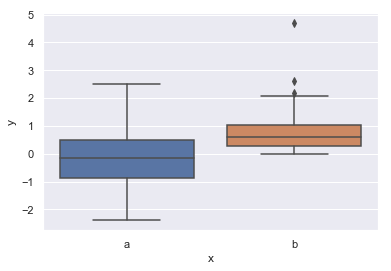

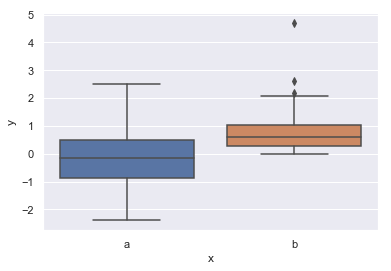

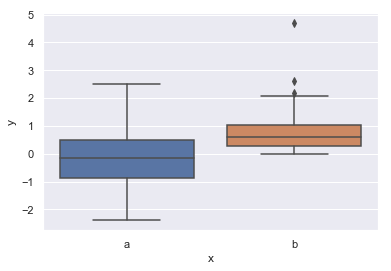

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

df = pd.DataFrame({
    'x': np.concatenate([np.tile('a', 100), np.tile('b', 100)]),
    'y': np.concatenate([np.random.normal(size = 100), np.random.exponential(size = 100)])})
sns.boxplot(df.x, df.y)
plt.show()

sns.boxplot(df['x'], df['y'])
plt.show()

sns.boxplot('x', 'y', data = df)
plt.show()

In [17]:
ans['Q13'] = 4

# finish!

to submit your HW please run this last code block and follow the instructions. <BR>
this code will create a CSV file in the current directory on the azure notebooks project <br>
please download it and submit it through moodle

In [18]:
import pandas as pd
df_ans = pd.DataFrame.from_dict(ans, orient='index')
if df_ans.shape[0] == 15:
    df_ans.to_csv('{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
    print("OK!")
else:
    print("seems like you missed a question, make sure you have run all the code blocks")

seems like you missed a question, make sure you have run all the code blocks
